In [3]:
import os, sys

sys.path = ["/opt/conda/envs/rapids/lib/python3.7/site-packages"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib/python3.7"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib"] + sys.path 

In [11]:
import cuml, cudf, cupy
import pandas as pd

In [27]:
df = pd.read_csv("train_transformed.csv")

In [28]:
df.head()

,id,target,ohe_0,ohe_1,ohe_2,ohe_3,ohe_4,ohe_5,ohe_6,ohe_7,...,targetencode_nom_6,targetencode_nom_7,targetencode_nom_8,targetencode_nom_9,targetencode_ord_0,targetencode_ord_1,targetencode_ord_2,targetencode_ord_3,targetencode_ord_4,targetencode_ord_5
0,26272,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.296146,0.345000,0.305263,0.375000,0.304774,0.307202,0.306757,0.306952,0.311261,0.292783
1,26273,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.330424,0.321716,0.357724,0.437500,0.307676,0.305120,0.304891,0.307607,0.299538,0.306967
2,26274,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.288256,0.284706,0.275362,0.448276,0.304774,0.305120,0.304625,0.306526,0.302581,0.325294
3,26275,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.314516,0.304124,0.311741,0.450980,0.308077,0.307720,0.304891,0.302458,0.307126,0.303447
4,26276,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.302956,0.274074,0.325670,0.214286,0.304774,0.307202,0.306757,0.306526,0.299044,0.296251


In [26]:
"target" in df.columns

False

In [15]:
df.sort_values("id").head()

,id,ohe_0,ohe_1,ohe_2,ohe_3,ohe_4,ohe_5,ohe_6,ohe_7,ohe_8,...,targetencode_nom_6,targetencode_nom_7,targetencode_nom_8,targetencode_nom_9,targetencode_ord_0,targetencode_ord_1,targetencode_ord_2,targetencode_ord_3,targetencode_ord_4,targetencode_ord_5
14080,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.309233,0.340249,0.324723,0.105263,0.306451,0.305122,0.306444,0.305053,0.308757,0.276680
14081,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.273159,0.306620,0.297297,0.307692,0.305221,0.305122,0.307824,0.303946,0.311754,0.305801
14082,2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.305389,0.311579,0.330935,0.413793,0.305221,0.306603,0.307348,0.305053,0.312932,0.312986
14083,3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.302128,0.289593,0.256158,0.318182,0.305221,0.305122,0.306332,0.306689,0.308757,0.321236
14084,4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.308557,0.293578,0.318841,0.257143,0.305221,0.305122,0.303328,0.303946,0.312932,0.299229


(array([3.68800e+03, 2.54030e+04, 1.18893e+05, 1.09633e+05, 3.43050e+04,
        7.00000e+03, 7.21000e+02, 1.46000e+02, 6.40000e+01, 1.47000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

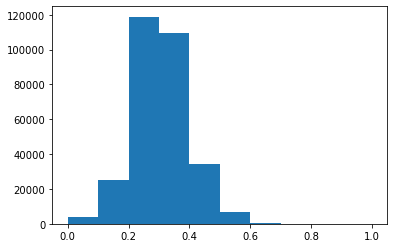

In [17]:
import matplotlib.pyplot as plt
plt.hist(df.targetencode_nom_9)

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import cross_validate
#import cudf, cuml
from sklearn.compose import ColumnTransformer
from cuml.metrics import roc_auc_score
from cuml.metrics import make_scorer

kf = StratifiedKFold(5, random_state=0, shuffle=True)

In [34]:
import numpy as np
lr_params = {'C': np.random.uniform(0, 10, 1000)}
model = cuml.linear_model.LogisticRegression()
gs = RandomizedSearchCV(model, param_distributions=lr_params, cv=kf, 
                        verbose=6, scoring=make_scorer(roc_auc_score), 
                        n_jobs=1, n_iter=100, random_state=0)
model = gs.fit(df.drop("target", axis=1), df['target'])

In [32]:
df.target.unique()

array([0, 1])